<a href="https://colab.research.google.com/github/nserdyukov/AIPD/blob/main/%D0%9B%D0%A08_%D0%A1%D0%B5%D1%80%D0%B4%D1%8E%D0%BA%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа 8. Основы обучаемых алгоритмов

Подключаем библиотеки

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Получаем данные

In [ ]:
!wget https://raw.githubusercontent.com/enikolaev/IT-and-Programming/refs/heads/main/data/pract8/pr8_09.txt

--2024-11-15 09:27:20--  https://raw.githubusercontent.com/enikolaev/IT-and-Programming/refs/heads/main/data/pract8/pr8_09.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6189 (6.0K) [text/plain]
Saving to: ‘pr8_09.txt’

pr8_09.txt          100%[===================>]   6.04K  --.-KB/s    in 0s      

2024-11-15 09:27:21 (60.5 MB/s) - ‘pr8_09.txt’ saved [6189/6189]



Данные из файла конвертируем в два массива: `X` (содержит координаты X точек) и `y` (содержит координаты Y точек)



In [ ]:
fi = open('pr8_09.txt')
X, y = [], []
for line in fi:
  s = line.strip().split()
  X += [[float(s[0])]]
  y += [[float(s[1])]]
X = np.array(X)
y = np.array(y)
print(y.shape[0])

500


Проанализируем полученное распределение:

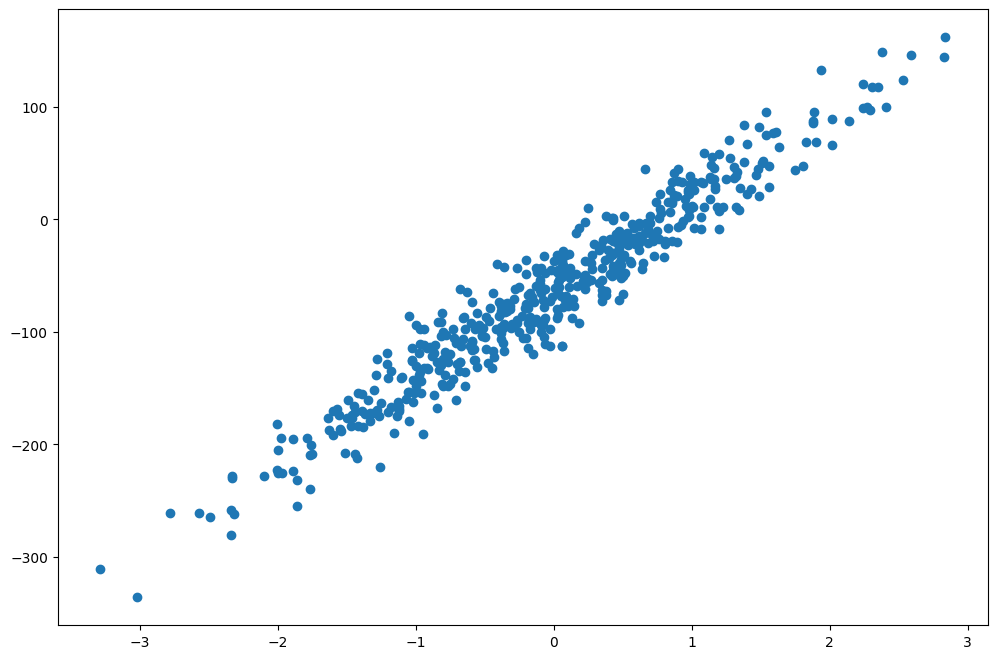

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X, y)

На основе визуального анализа делаем вывод, что распределение очень напоминает линейное! Поэтому пробуем аппроксимировать данное распределение прямой $y=k*x+b$. Процесс обучения нашей модели сводится к вычислению коэффициентов $k$ и $b$.

Обучение будем реализовывать на основе алгоритма градиентного спуска с некоторой скоростью $alpha$

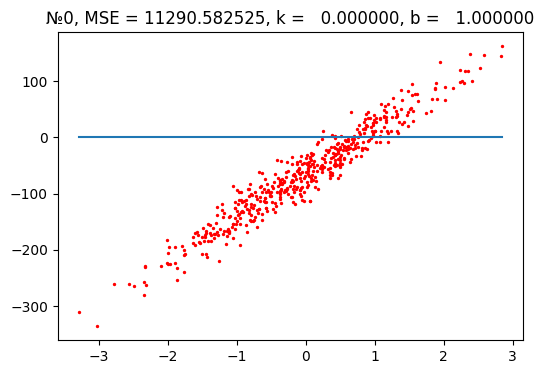

<ipython-input-22-d194e5b5dca6>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  k = float(k - alpha * gk)


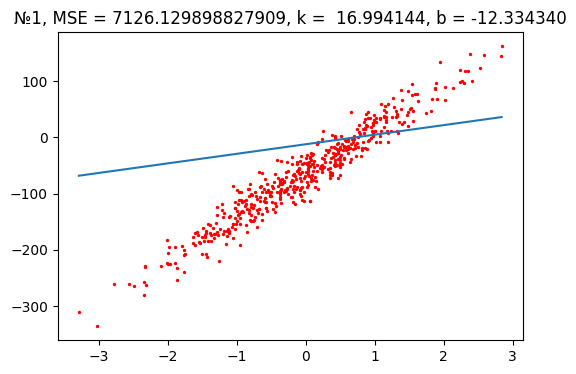

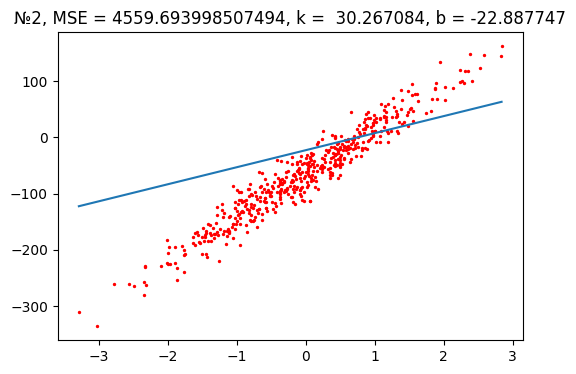

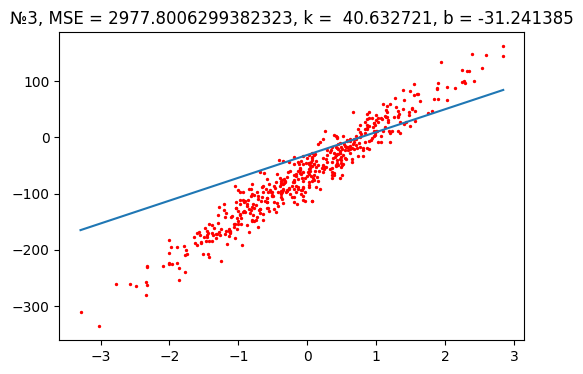

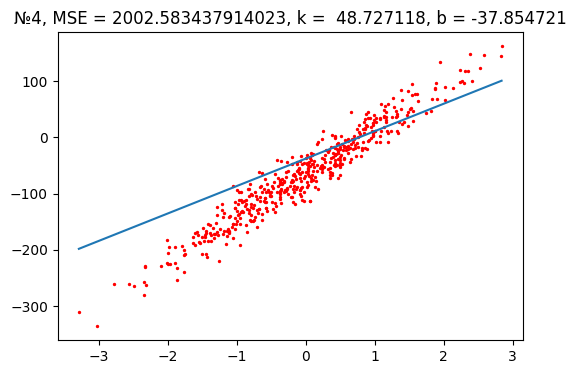

In [ ]:
# Инициализируем начальные значения коэффициентов для прямой
k, b = 0.0, 1.0
# диапазон X:
xmin, xmax = min(X), max(X)
# Скорость обучения
alpha = 0.1
# количество итераций обучения:
N = 5
for i in range(N):
  # вычисляем фактическое значение y_pred на основе эмпирического x
  y_pred = k*X + b
  # вычисляем среднеквадратичное отклонение (MSE)
  MSE = np.sum( (y - y_pred)**2 ) / y.shape[0]
  # построим график
  plt.figure(figsize=(6,4))
  plt.scatter(X, y, color='red', s=2)
  plt.plot([xmin, xmax], [k*xmin+b, k*xmax+b])
  plt.title(f'№{i}, MSE = {MSE}, k = {k:10f}, b = {b:10f}' )
  plt.show()
  # вычисляем градиенты ошибок
  gk = - ( 2 * np.dot(X.T, (y - y_pred))) / y.shape[0]
  gb = - 2 * np.sum(y - y_pred) / y.shape[0]
  # корректируем веса модели на основе ошибки и скорости обучения
  k = float(k - alpha * gk)
  b = b - alpha * gb


MSE = 2002.583437914023, k =  55.047328, b = -43.091061


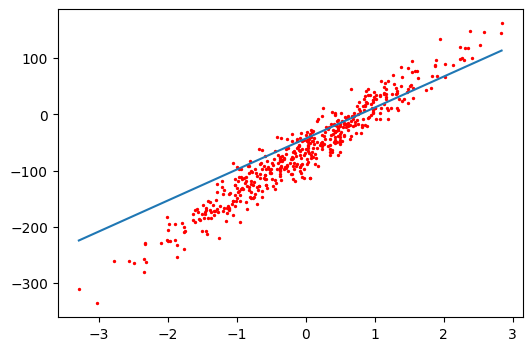

In [ ]:
# Проверяем полученную модель:
print(f'MSE = {MSE}, k = {k:10f}, b = {b:10f}')
plt.figure(figsize=(6,4))
plt.scatter(X, y, color='red', s=2)
x0 = X.min()
x1 = X.max()
plt.plot([x0, x1], [k*x0+b, k*x1+b])
plt.show()

Очевидно, что параметры модели $k = 66.816708$, $b =  -0.710867$ достаточно точно позволяют описать данное распределение.